# Regularization

### Techniques

<font color=blue>
    
- L1 Regularization
- L2 Regularization
- Dropout
- Data Augmentation
- K-fold cross validation
- Early Stopping
</font>

Regularization means how we can improve the performance of neural network that we have created. By performance we mean that-

- It is not overfitting (on training data performs nicely but on testing data does not perform as expected) or underfitting
- If the n/w is giving good accuracy
- If it is not taking a lot of time


There are different ways through which we can improve the performance of neural n/w & collectively these are known as regularization methods.

If the model can be generalized then it will be a perfect model. Regularization helps generalization.

**Keras** is more flexible compared to **Scikit-learn** as it has got concept of models and layers which help us in developing the structure of our network. 

We studies 2 types of neural networks - ANN and CNN.

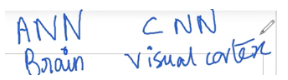

1. **ANN** - It is how our brain sees the things - More appropriate for tabular data although can be used for image data but as quality of image is high dimensionality increases tremendously performance of ANN detoriate & we may not get desired accuracy. 
2. **CNN** - How our eyes sees the things. More appropriate for image data although can be used for tabular,text data.

Although eye and brain are connected with each other but concept is a bit different.

*<font color=blue>Challenge of Overfittting*

To check overfitting you can check through classification report/metrics but graph visualization is a better option as you can easily see how training and testing loss decreases/increases with more epochs. 

**L1, L2, Dropout**

Overfitting, also known as High Variance, occurs when a model learns the training data too well but fail to generalize to new data. So the challenges are we need to prevent overfitting for that we have got some techniques e.g. dropout, L1, L2 regularization methods.

*<font color=blue>Challenge of not a good accuracy*

**Data Augmentation**

If the samples provided are not enough even then performace will detoriate, so how you can work with smaller sample that is also a challenge & we got some techniques like Data Augmentation.

*<font color=blue>Challenge of time*

**Early Stopping**

Another challenge how we can make our neural n/w faster. Architecture will play some role but we generally fix the number of epochs but there is a possibility that we reach good result even before reaching the 100th epoch. So that is called improving the performance in time. Naturally 100 epochs will take more time compared to 75 epochs.That is known as early stopping in Keras.

## Regularization Techniques

#### Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus minimize/prevent the overfitting.

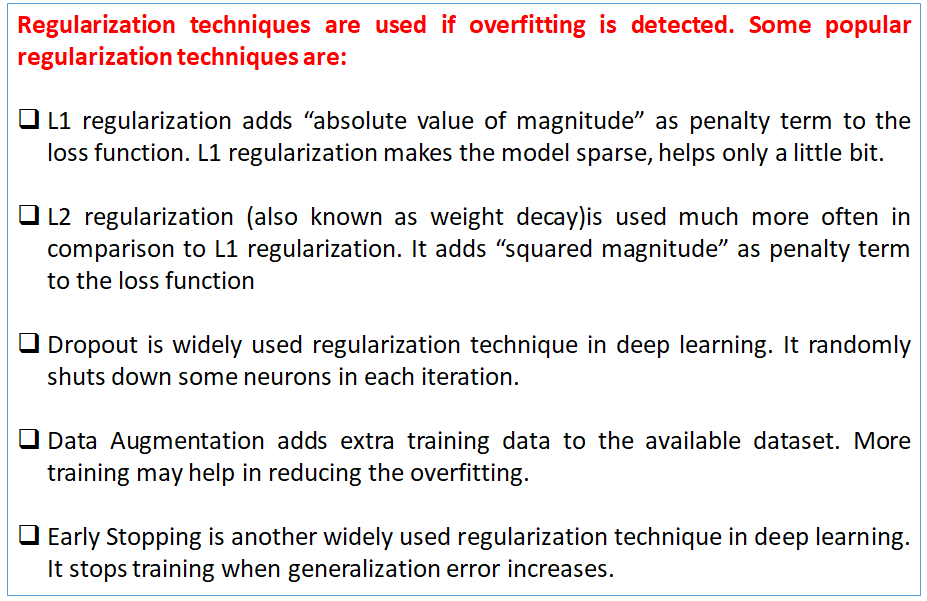

## <font color=blue>L1, L2, Dropout Techniques - Works on weights

- All these regularization methods somehow they work on the weights of the neural n/w. They target the weights of the neural n/w inorder to improve its performance.
- L1 regularization it makes weights exactly equal to 0.
- L2 regularization, it slowly decreases the value of the weights & is also known as weight decay methods.
- It is observed that L2 is better in comparison to L1.
- In dropout also we target weights & some of the weights (specified number of weights) are neglected in the different layers.
- I/P and O/P are known to us. We do not apply regularization in i/p or o/p we apply regularization in the in between layers so those are information processing nodes connected by weights. 
- With L1 and L2 regularization in a way we r distributing information in hidden layers so information does not gets concentrated in one place. Because when information is concentrated then also there is a problem of stagnation. Your algorithm will keep on executing but u will not reach a good solution.



## <font color=blue>Data Augmentation Technique - Works on dataset provided 

The performance of ANN or CNN depends a lot on data that is provided. If data is not sufficient we will not be able to reach to correct answer no matter how good or complex our architecture is, if data is not correct.

We have trained our data it means if there is overfitting means our data is performing well over a limited number of dataset we have. In augmentation we try to generate different type of data from the same set we r having.

e.g. for image we can change orientation, contrast, chop it a bit etc which will not only increase dataset but also increase variety of dataset. So it will have more examples to learn from.

## <font color=blue>K Fold cross validation - Works on dataset provided 

- In K-fold validation in the same dataset we keep on taking different sets for testing so that also creates a sort of randomness in the dataset we r having.
- This cross-validation we do when dataset is not sufficient/ having smaller dataset (if datset is big enough, already randomized) but if dataset is small need to randomize and check to see if performance is reliable.
- You keep on taking different training and testing datasets each time.
- k-fold will definitely increase time complexity and it is generally suited for smaller datasets while for larger datasets even shuffling may solve the purpose.

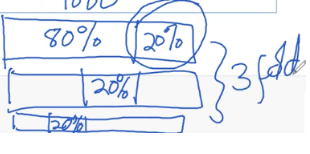

*<font color=blue>Data Augmentation and K-fold are applied when dataset is not very huge. When dataset is huge & it is unbiased dataset (the classes r also equally distributed) then simply shuffling data can also give u good result.*

*If dataset is not concentrated & u r having a huge dataset, you can simply shuffle that as then k-fold may not have very good results, it will only increase the time complexity*

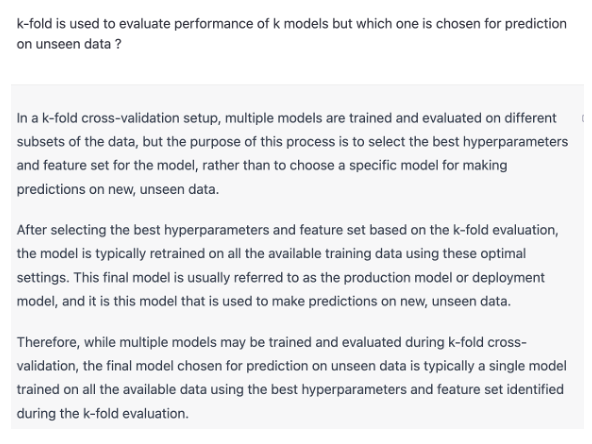

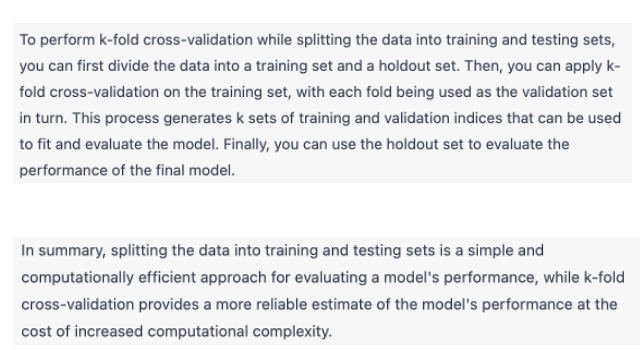

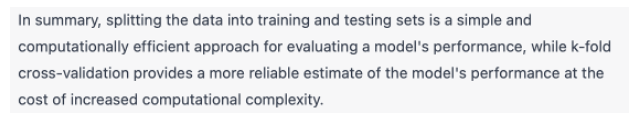

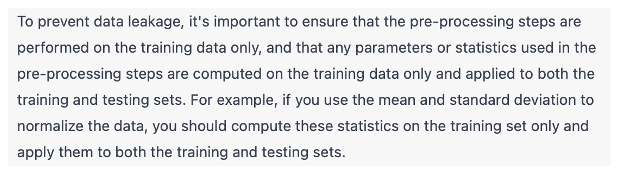

## <font color=blue>Early Stopping Technique - Works on Epoch / Execution

**Scenario1**
- In this technique we stop the n/w as soon as it reaches to a good solution/desired solution. Lets say we gave 100 epochs sometimes what happens is after 70th epoch or so there is no change in the quality of solution obtained. The n/w will keep on executing but the solution will not change (i.e. error will not reduce any further). 
- Ideally error should change/reduce at end of every epoch but when there is no change in error then we say algorithm has reached stage of stagnation.


**Scenario2**
- There is possibility where solution is getting good but since we r not stopping algorithm at that time there is possibility that after some time error may increase also.


For this we need to set some sort of accuracy / error e.g. error <= 10^-3 i.e. as soon as error is 0.001 it should stop.

### Ques - Which regularization technique to choose where?

- We might need to do some permutation & combination cz what exactly will work is v.difficult to predict in beginning itself.
- Data Augmentation and K-fold we can safely apply when dataset is not sufficiently large.
- Early stopping also we can apply without any hesitation to our network.

### Ques - At which step of applying ML do we apply Regularization ?

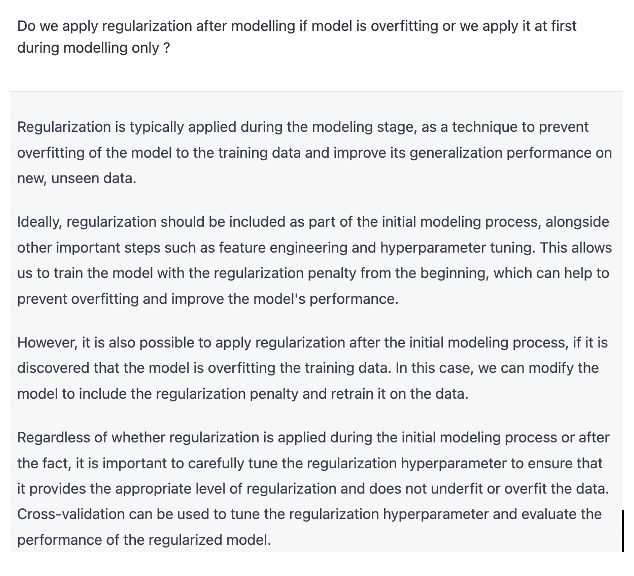

### Importing the useful files

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


**Split into feature vectors and target**

In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)   # one-hot encoded
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

1. Build an unregularized neural network model

Before applying regularization, let’s build a neural network without regularization and take a look at the overfitting issue.

*<font color=blue>When we build a simple neural n/w ANN then model is Sequential and all the layers r densely connected with each other.This is not the case with CNN. In CNN not all layers r densely connected with each other*

## Forward Pass

### Build Architecture 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## def create_model(): 
model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    ## return model

2023-03-31 02:16:03.600889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


    The first layer (also known as the input layer) has the input_shape to set the input size (4,)
    The input layer has 64 units, followed by 3 dense layers, each with 128 units. 
    Then there are further 3 dense layers, each with 64 units. 
    All these layers use the ReLU activation function.
    The output Dense layer has 3 units and the softmax activation function.

In [10]:
##model = model_1
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

1.1 Training a model

In order to train a model, we first have to configure our model using compile() and pass the following arguments:

    Use Adam (adam) optimization algorithm as the optimizer
    Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
    For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.

## Backward Pass

### Compile the model 

Define work to be done in the Backward pass


- Optimizer 
- Loss function (over which the optimizer works)
- Metrics (to evaluate your algorithm)

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', # if ohe labels use categorical_crossentropy
    metrics=['accuracy']
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40,   # concept that tries to add more randomness to ur n/w
    verbose=2
)

Epoch 1/200
3/3 - 0s - loss: 1.0696 - accuracy: 0.4000 - val_loss: 1.0387 - val_accuracy: 0.2667 - 436ms/epoch - 145ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9603 - accuracy: 0.4889 - val_loss: 0.9472 - val_accuracy: 0.5667 - 21ms/epoch - 7ms/step
Epoch 3/200
3/3 - 0s - loss: 0.8560 - accuracy: 0.7000 - val_loss: 0.8414 - val_accuracy: 0.5667 - 22ms/epoch - 7ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7375 - accuracy: 0.7000 - val_loss: 0.7327 - val_accuracy: 0.5667 - 19ms/epoch - 6ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6299 - accuracy: 0.7000 - val_loss: 0.6017 - val_accuracy: 0.5667 - 19ms/epoch - 6ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5395 - accuracy: 0.7000 - val_loss: 0.5085 - val_accuracy: 0.6000 - 22ms/epoch - 7ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4557 - accuracy: 0.7111 - val_loss: 0.4523 - val_accuracy: 0.6333 - 19ms/epoch - 6ms/step
Epoch 8/200
3/3 - 0s - loss: 0.3885 - accuracy: 0.7222 - val_loss: 0.3650 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 9/200
3/3 - 0s - loss: 

Epoch 69/200
3/3 - 0s - loss: 0.0664 - accuracy: 0.9556 - val_loss: 0.1721 - val_accuracy: 0.9333 - 17ms/epoch - 6ms/step
Epoch 70/200
3/3 - 0s - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.1805 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0620 - accuracy: 0.9667 - val_loss: 0.1719 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0497 - accuracy: 0.9667 - val_loss: 0.1792 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0632 - accuracy: 0.9556 - val_loss: 0.1736 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0496 - accuracy: 0.9778 - val_loss: 0.1730 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 75/200
3/3 - 0s - loss: 0.0424 - accuracy: 0.9889 - val_loss: 0.1750 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 76/200
3/3 - 0s - loss: 0.0399 - accuracy: 0.9889 - val_loss: 0.1934 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 77/200
3/3 - 0s - 

Epoch 136/200
3/3 - 0s - loss: 0.0516 - accuracy: 0.9778 - val_loss: 0.1449 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0427 - accuracy: 0.9778 - val_loss: 0.1659 - val_accuracy: 0.9667 - 17ms/epoch - 6ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.1849 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0467 - accuracy: 0.9778 - val_loss: 0.1716 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0555 - accuracy: 0.9778 - val_loss: 0.1805 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.1989 - val_accuracy: 0.9333 - 18ms/epoch - 6ms/step
Epoch 143/200
3/3 - 0s - loss: 0.0482 - accuracy: 0.9667 - val_loss: 0.1800 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 144/200
3/

### Model Evaluation

In [13]:
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    plt.figure(figsize=(5,3))
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

### Plot the training and validation loss

plotting the loss vs. epochs graph on the training and validation sets
From the graph, it can be seen that the model has vastly overfitted the training data, so it outperform the validation set

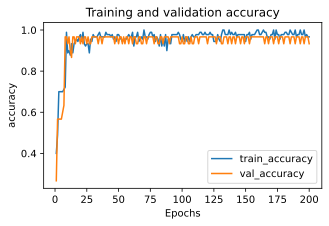

In [14]:
plot_metric(history, 'accuracy')

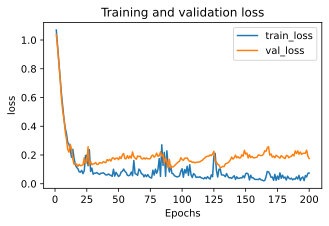

In [15]:
plot_metric(history, 'loss')

*<font color=blue>In Early Stopping part we will see where we could have stopped our algorithm based on above accuracy and loss curves*

In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0628 - accuracy: 0.9667 - 15ms/epoch - 15ms/step


[0.06280997395515442, 0.9666666388511658]

## 2. Adding L2 regularization and Dropout

## Import Dropout and L2 regularization from TensorFlow Keras package

Create a function called create_regularized_model() that will return a model similar to the one we built before. 
However, L2 regularization and Dropout layers are added.
The function will take 2 arguments: a L2 regularization factor and a Dropout rate.

    Add L2 regularization in all layers except the output layer [1].
    Add Dropout layer between every two dense layers.

## Forward Pass

### Build Architecture 

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
regularized_model = create_regularized_model(1e-5, 0.3)

In [19]:
regularized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

Parameters remain same as when model was unregularized. We r only avoiding some of neurons in b/w when we r making use of Dropout layer or we r slowly reducing values of weights considering a penalty on those weights which is the way of working of L2 regularization.

## Backward Pass

### Compile the model 


In [20]:
# Compile the model
regularized_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### Fit the model to the training data

In [21]:
# Train the model, with some of the data reserved for validation
history1 = regularized_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.2709 - accuracy: 0.2444 - val_loss: 1.1011 - val_accuracy: 0.4667 - 648ms/epoch - 216ms/step
Epoch 2/200
3/3 - 0s - loss: 1.1517 - accuracy: 0.3000 - val_loss: 1.1103 - val_accuracy: 0.2667 - 19ms/epoch - 6ms/step
Epoch 3/200
3/3 - 0s - loss: 1.0959 - accuracy: 0.3667 - val_loss: 1.1113 - val_accuracy: 0.2667 - 19ms/epoch - 6ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1065 - accuracy: 0.3444 - val_loss: 1.1088 - val_accuracy: 0.2667 - 19ms/epoch - 6ms/step
Epoch 5/200
3/3 - 0s - loss: 1.1258 - accuracy: 0.3333 - val_loss: 1.1016 - val_accuracy: 0.2667 - 18ms/epoch - 6ms/step
Epoch 6/200
3/3 - 0s - loss: 1.1301 - accuracy: 0.2556 - val_loss: 1.0973 - val_accuracy: 0.2667 - 18ms/epoch - 6ms/step
Epoch 7/200
3/3 - 0s - loss: 1.0952 - accuracy: 0.3444 - val_loss: 1.0961 - val_accuracy: 0.2667 - 19ms/epoch - 6ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0676 - accuracy: 0.4000 - val_loss: 1.0965 - val_accuracy: 0.2667 - 18ms/epoch - 6ms/step
Epoch 9/200
3/3 - 0s - loss: 

Epoch 69/200
3/3 - 0s - loss: 0.4664 - accuracy: 0.6889 - val_loss: 0.4795 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 70/200
3/3 - 0s - loss: 0.4756 - accuracy: 0.7111 - val_loss: 0.4795 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 71/200
3/3 - 0s - loss: 0.4935 - accuracy: 0.7222 - val_loss: 0.4799 - val_accuracy: 0.7667 - 18ms/epoch - 6ms/step
Epoch 72/200
3/3 - 0s - loss: 0.4640 - accuracy: 0.7000 - val_loss: 0.4795 - val_accuracy: 0.5667 - 18ms/epoch - 6ms/step
Epoch 73/200
3/3 - 0s - loss: 0.4473 - accuracy: 0.7222 - val_loss: 0.4799 - val_accuracy: 0.5667 - 18ms/epoch - 6ms/step
Epoch 74/200
3/3 - 0s - loss: 0.4562 - accuracy: 0.6889 - val_loss: 0.4813 - val_accuracy: 0.5667 - 18ms/epoch - 6ms/step
Epoch 75/200
3/3 - 0s - loss: 0.4339 - accuracy: 0.6889 - val_loss: 0.4806 - val_accuracy: 0.5667 - 18ms/epoch - 6ms/step
Epoch 76/200
3/3 - 0s - loss: 0.5247 - accuracy: 0.6778 - val_loss: 0.4805 - val_accuracy: 0.5667 - 19ms/epoch - 6ms/step
Epoch 77/200
3/3 - 0s - 

Epoch 136/200
3/3 - 0s - loss: 0.2739 - accuracy: 0.9111 - val_loss: 0.2326 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 137/200
3/3 - 0s - loss: 0.2838 - accuracy: 0.8778 - val_loss: 0.2244 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 138/200
3/3 - 0s - loss: 0.2591 - accuracy: 0.9000 - val_loss: 0.2190 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 139/200
3/3 - 0s - loss: 0.2017 - accuracy: 0.9667 - val_loss: 0.2053 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 140/200
3/3 - 0s - loss: 0.2545 - accuracy: 0.9333 - val_loss: 0.1958 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 141/200
3/3 - 0s - loss: 0.2607 - accuracy: 0.9111 - val_loss: 0.2084 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 142/200
3/3 - 0s - loss: 0.2389 - accuracy: 0.9000 - val_loss: 0.1953 - val_accuracy: 0.9667 - 19ms/epoch - 6ms/step
Epoch 143/200
3/3 - 0s - loss: 0.2580 - accuracy: 0.8889 - val_loss: 0.1576 - val_accuracy: 0.9667 - 18ms/epoch - 6ms/step
Epoch 144/200
3/

### Plot the learning curves

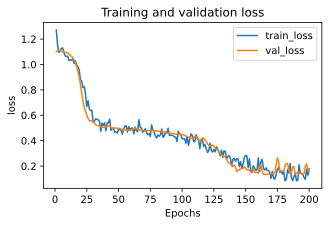

In [22]:
plot_metric(history1, 'loss')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

### Model Evaluation

In [23]:
# Evaluate the model on the test set
regularized_model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0386 - accuracy: 0.9667 - 15ms/epoch - 15ms/step


[0.03863156959414482, 0.9666666388511658]

This is shown on iris dataset. With more complex datasets u will be able to better see implementation of these regularization methods.

## Learning Curve of Unregularised vs Regularised Network

<Figure size 1000x300 with 0 Axes>

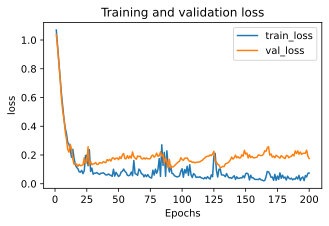

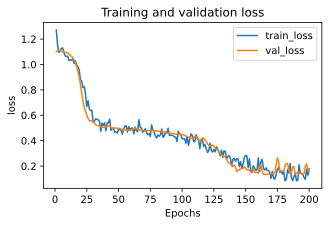

In [24]:
plt.figure(figsize=(10,3))

plot_metric(history, 'loss');    # Unregularized model
plot_metric(history1, 'loss');   # Regularised model


From above plots of unregularized and regularised model we can clearly see that the overfitting (as seen from difference b/w training & validation loss) in case of unregularised model is overcome to great extent in regularised model (where  training & validation loss are closer comparatively).